In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(r"C:\\Users\\ashka\\Downloads\\Kaggle\\Top 4 Used Car Sales Datasets Combined\\output.csv")
print(df.head())

      brand     model transmission  age    fuel  engine       km  owner  \
0  mahindra      thar       manual  4.0  diesel  2184.0  11003.0    1.0   
1   hyundai     verna       manual  6.0  petrol  1591.0  66936.0    1.0   
2      tata   harrier       manual  2.0  diesel  1956.0  27990.0    1.0   
3     honda      city    automatic  1.0  petrol  1498.0   5061.0    1.0   
4      ford  ecosport       manual  3.0  diesel  1498.0  23480.0    1.0   

       price location  mileage  power  seats type  
0  1231000.0      NaN      NaN    NaN    NaN  NaN  
1   786000.0      NaN      NaN    NaN    NaN  NaN  
2  1489000.0      NaN      NaN    NaN    NaN  NaN  
3  1227000.0      NaN      NaN    NaN    NaN  NaN  
4   887000.0      NaN      NaN    NaN    NaN  NaN  


In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [3]:
df.info()

unique_counts = df.nunique()
print("Unique value counts per column:\n", unique_counts)

missing_values = df.isna().sum()
print("Missing values per column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   km            32200 non-null  float64
 7   owner         16819 non-null  float64
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(8), object(6)
memory usage: 3.4+ MB
Unique value counts per column:
 brand              35
model             301
transmission        2
age                28
fuel                5
engine  

In [4]:
# Describe the numeric columns and display correlations
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print("Descriptive statistics:\n", numeric_df.describe())
print("\nCorrelations with price:\n", numeric_df.corr()['price'].sort_values(ascending=False))


Descriptive statistics:
                 age        engine            km         owner         price  \
count  32199.000000  24068.000000  3.220000e+04  16819.000000  3.220000e+04   
mean       7.120625   1489.872569  5.495269e+04      1.263452  7.347001e+05   
std        3.485577    520.916872  5.577145e+04      0.490463  7.037702e+05   
min        0.000000     72.000000  0.000000e+00      1.000000  4.000000e+04   
25%        4.000000   1197.000000  3.020825e+04      1.000000  3.850000e+05   
50%        7.000000   1248.000000  5.000000e+04      1.000000  5.510000e+05   
75%        9.000000   1591.000000  7.102075e+04      1.000000  7.920000e+05   
max       29.000000   5998.000000  6.500000e+06      4.000000  7.066000e+06   

            mileage         power         seats  
count  21380.000000  21273.000000  29353.000000  
mean      19.305532    103.497647      5.233537  
std        4.418605     45.002260      0.707639  
min        0.000000     34.200000      0.000000  
25%       16.

In [5]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


brand: 35
model: 301
transmission: 2
age: 28
fuel: 5
engine: 156
km: 15977
owner: 4
price: 2286
location: 26
mileage: 536
power: 456
seats: 9
type: 5


In [6]:
df.isna().sum()


brand               1
model               1
transmission        0
age                 1
fuel                0
engine           8132
km                  0
owner           15381
price               0
location        18399
mileage         10820
power           10927
seats            2847
type            24185
dtype: int64

Mileage Statistics:
 count    21380.000000
mean        19.305532
std          4.418605
min          0.000000
25%         16.500000
50%         19.010000
75%         22.320000
max         46.620600
Name: mileage, dtype: float64


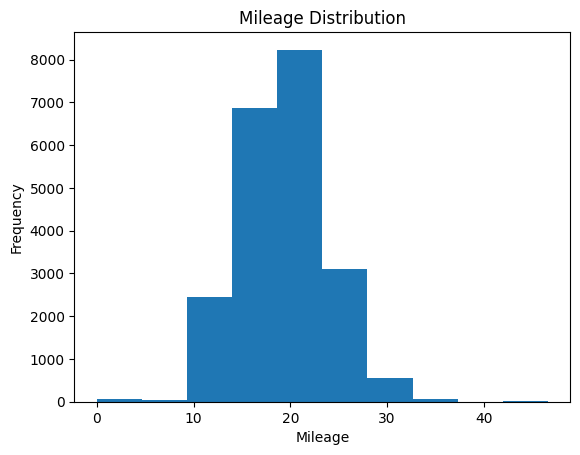

In [7]:
# Detailed analysis for 'mileage' column
print("Mileage Statistics:\n", df['mileage'].describe())
df['mileage'].plot.hist(title="Mileage Distribution")
plt.xlabel("Mileage")
plt.show()


In [8]:
df['mileage'].describe()


count    21380.000000
mean        19.305532
std          4.418605
min          0.000000
25%         16.500000
50%         19.010000
75%         22.320000
max         46.620600
Name: mileage, dtype: float64

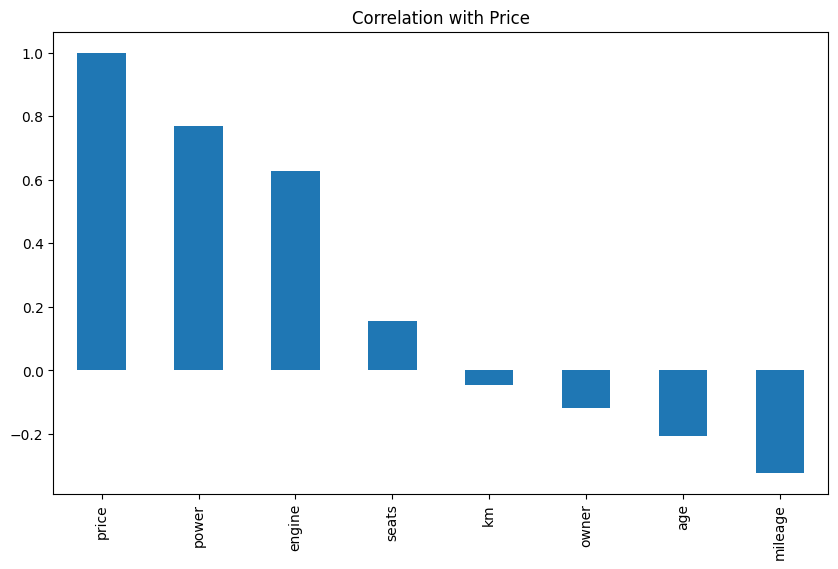

In [9]:
# Plot correlations with 'price'
numeric_df.corr()['price'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Correlation with Price")
plt.show()


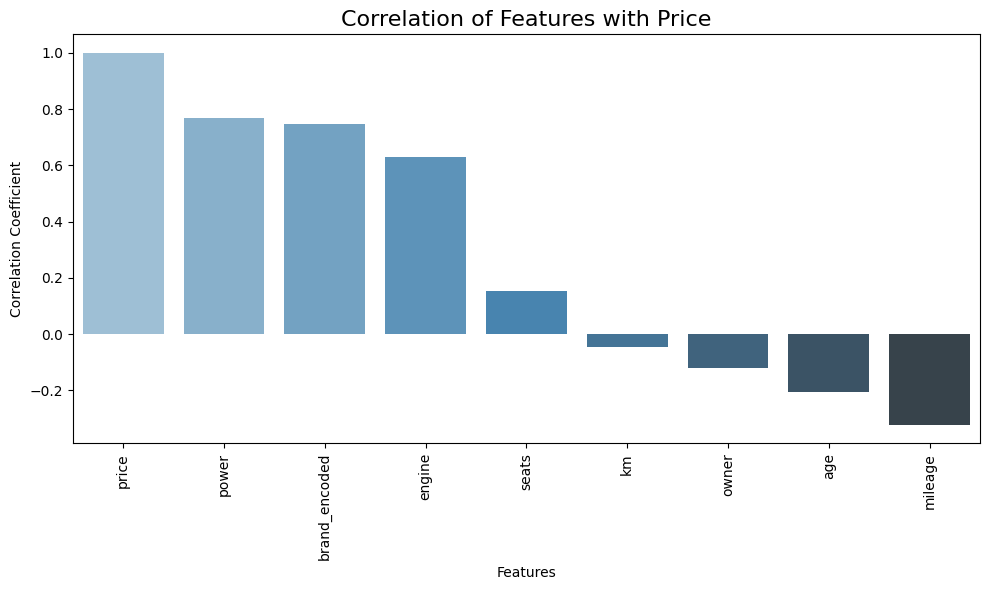

In [10]:
df['brand'] = df['brand'].fillna('Unknown')

# Step 1: Target Encoding for 'brand'
def leave_one_out_median(brand, price):
    brand_prices = df[df['brand'] == brand]['price']
    if len(brand_prices) > 1:
        return brand_prices[brand_prices != price].median() if price in brand_prices.values else price_median_by_brand[brand]
    else:
        return price_median_by_brand[brand]

price_median_by_brand = df.groupby('brand')['price'].median()
df['brand_encoded'] = df.apply(lambda row: leave_one_out_median(row['brand'], row['price']), axis=1)

# Step 2: One-Hot Encode other categorical columns
df_encoded = pd.get_dummies(df, columns=['model', 'transmission', 'fuel', 'location', 'type'], drop_first=True)

# Step 3: Keep only numeric columns for correlation calculation
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64'])

# Step 4: Recalculate the correlation with 'price'
correlation_with_price = df_numeric.corr()['price'].sort_values(ascending=False)

# Step 5: Plot the correlation as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values, palette='Blues_d')
plt.title('Correlation of Features with Price', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [11]:
df.isna().sum()

brand                0
model                1
transmission         0
age                  1
fuel                 0
engine            8132
km                   0
owner            15381
price                0
location         18399
mileage          10820
power            10927
seats             2847
type             24185
brand_encoded        0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

# Drop features with high missingness and low predictive power
df = df.drop(columns=['type', 'location'])

# Impute essential numeric features with high correlation to 'price'
median_imputer = SimpleImputer(strategy='median')
df['power'] = median_imputer.fit_transform(df[['power']])
df['engine'] = median_imputer.fit_transform(df[['engine']])
df['mileage'] = median_imputer.fit_transform(df[['mileage']])

# Drop non-essential columns or columns with very low correlation
df = df.drop(columns=['seats', 'owner'])  # Drop if they add little value

# Verify the remaining columns
print("Remaining columns after processing:", df.columns)
print("Missing values after imputation:\n", df.isnull().sum())

Remaining columns after processing: Index(['brand', 'model', 'transmission', 'age', 'fuel', 'engine', 'km',
       'price', 'mileage', 'power', 'brand_encoded'],
      dtype='object')
Missing values after imputation:
 brand            0
model            1
transmission     0
age              1
fuel             0
engine           0
km               0
price            0
mileage          0
power            0
brand_encoded    0
dtype: int64


In [13]:
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
print("Missing values after final imputation:\n", df.isnull().sum())

Missing values after final imputation:
 brand            0
model            0
transmission     0
age              0
fuel             0
engine           0
km               0
price            0
mileage          0
power            0
brand_encoded    0
dtype: int64


In [14]:
# Drop all brand-related columns except the original 'brand'
df = df.drop(columns=['brand_encoded', 'brand_model', 'brand_model_avg_price'], errors='ignore')
print("Remaining columns after dropping redundant brand columns:", df.columns)

Remaining columns after dropping redundant brand columns: Index(['brand', 'model', 'transmission', 'age', 'fuel', 'engine', 'km',
       'price', 'mileage', 'power'],
      dtype='object')


In [15]:
df_encoded = pd.get_dummies(df, columns=['brand', 'model', 'transmission', 'fuel'], drop_first=True)
print("Shape of df_encoded after one-hot encoding:", df_encoded.shape)

Shape of df_encoded after one-hot encoding: (32200, 346)


In [16]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing sets created.")

Training and testing sets created.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Train and evaluate each model
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print("  RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("  R^2 Score:", r2_score(y_test, y_pred))
    print("-" * 30)


Linear Regression Performance:
  RMSE: 324574.24451193557
  R^2 Score: 0.8006648634815806
------------------------------
Random Forest Performance:
  RMSE: 218183.31959909908
  R^2 Score: 0.90992612669934
------------------------------
XGBoost Performance:
  RMSE: 221231.7177780199
  R^2 Score: 0.9073915679832714
------------------------------


In [18]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Set up parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the RandomizedSearchCV
xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                                   n_iter=20, scoring='neg_root_mean_squared_error',
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best estimator and evaluate on the test set
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("Optimized XGBoost Performance:")
print("  RMSE:", mean_squared_error(y_test, y_pred_best_xgb, squared=False))
print("  R^2 Score:", r2_score(y_test, y_pred_best_xgb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimized XGBoost Performance:
  RMSE: 206679.9029761487
  R^2 Score: 0.9191737841868799


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Adjusted parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid_rf, 
    n_iter=20, 
    scoring='neg_root_mean_squared_error',
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the random search to the data
random_search_rf.fit(X_train, y_train)

# Evaluate the optimized Random Forest
best_rf = random_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Optimized Random Forest Performance:")
print("  RMSE:", mean_squared_error(y_test, y_pred_best_rf, squared=False))
print("  R^2 Score:", r2_score(y_test, y_pred_best_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimized Random Forest Performance:
  RMSE: 217943.51375803546
  R^2 Score: 0.9101240187338414


c:\Users\ashka\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


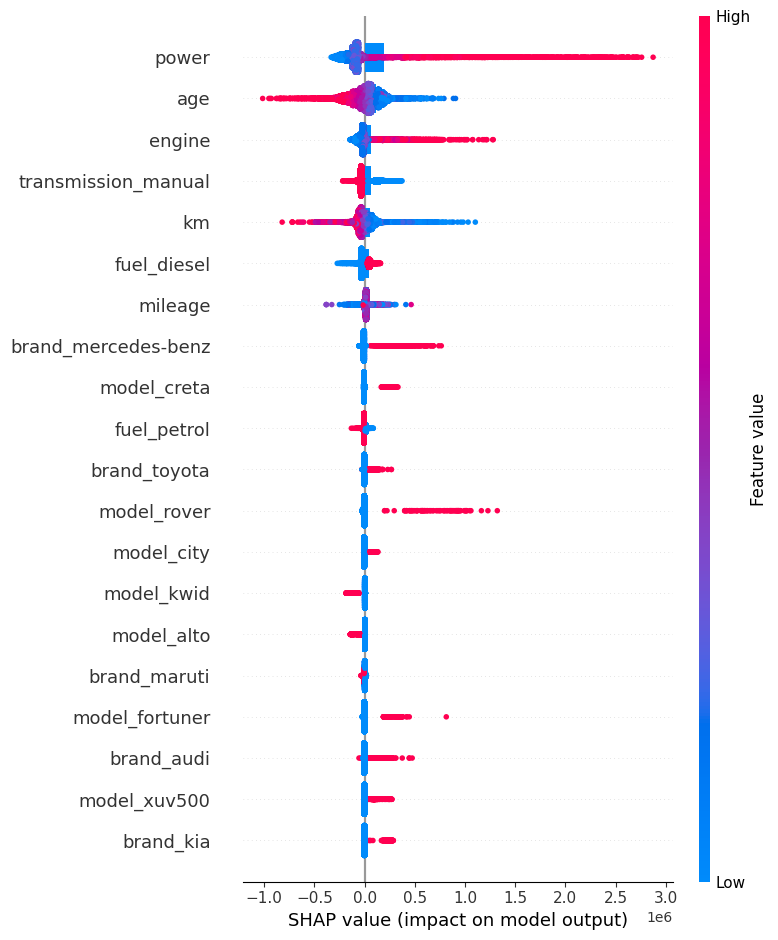

In [20]:
import shap

# Initialize the SHAP explainer for the optimized XGBoost model
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)

# Plot feature importance based on SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
shap.summary_plot(shap_values, X_train, show=False)